In [1]:
from gym_ergojr.sim.single_robot import SingleRobot
from gym_ergojr.utils.math import RandomPointInHalfSphere
import pybullet as p
import numpy as np


pybullet build time: Sep 30 2024 18:30:01


In [54]:
robot = SingleRobot()

In [3]:
p.getNumJoints(robot.id)

14

In [4]:
joint_limits = []
for joint_index in range(p.getNumJoints(robot.id)):
    joint_info = p.getJointInfo(robot.id, joint_index)
    joint_limits.append((joint_info[8], joint_info[9]))  # joint lower and upper limits

print(joint_limits)

[(0.0, -1.0), (0.0, -1.0), (0.0, -1.0), (-1.570796326795, 1.570796326795), (-1.570796326795, 1.570796326795), (0.0, -1.0), (-1.570796326795, 1.570796326795), (0.0, -1.0), (-1.570796326795, 1.570796326795), (0.0, -1.0), (-1.570796326795, 1.570796326795), (0.0, -1.0), (0.0, -1.0), (0.0, -1.0)]


In [56]:
p.getJointState(1,13)

(0.0, 0.0, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 0.0)

In [57]:
p.getLinkState(robot.id,3)

((0.0, 0.0375, 0.035),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.03750000149011612, 0.03500000014901161),
 (0.0, 0.0, 0.0, 1.0))

In [3]:
robot.set([ 0,0,0,0,0,0,0,0,0,0,0])

In [8]:
p.getJointState(1,3)

(0.0, 0.0, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 0.0)

In [4]:
p.getLinkState(robot.id,13)

((0.0, 0.1545, 0.15600000000000003),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.15449999272823334, 0.15600000321865082),
 (0.0, 0.0, 0.0, 1.0))

In [65]:
rhis=RandomPointInHalfSphere(0.0,0.0369,0.0437,radius=0.2022,height=0.2610,min_dist=0.1)


In [50]:
target=rhis.samplePoint()
for i in range(1000):
    x=p.calculateInverseKinematics(bodyIndex=1, 
                                endEffectorLinkIndex=13, 
                                targetPosition=target)
    robot.set(np.concatenate([np.array(x),np.zeros(5)]))
    if i ==0 or i==100 or i ==500 or i ==1000 or i==9999:
        position=np.array(p.getLinkState(robot.id,13)[0])
        print(np.linalg.norm(position-target))

0.11952845459377547
0.0001871052822445007
5.3182924071890066e-05


In [73]:
import matplotlib.pyplot as plt

Liberary setting
 points was reachable 775 times; mean iterations 168.45806451612904
 points was not reachable 225 times


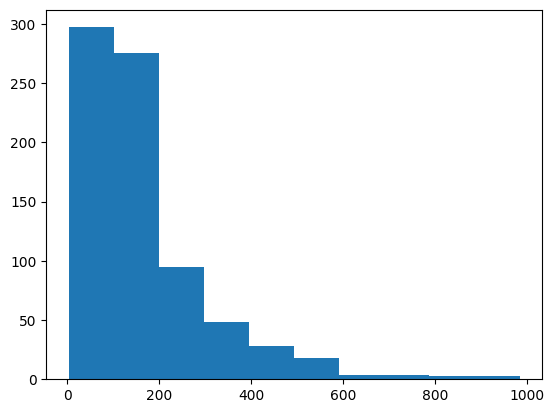

New setting
 points was reachable 899 times; mean iterations 136.7575083426029
 points was not reachable 101 times


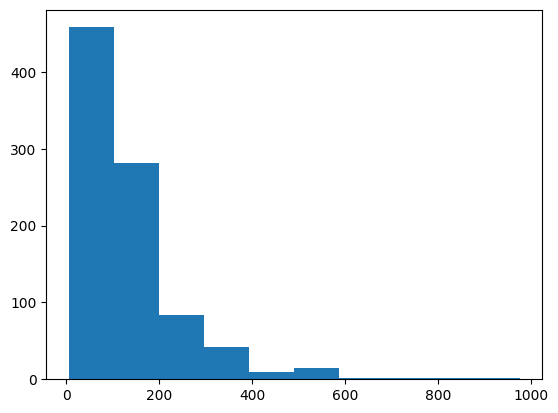

In [80]:
reachable_points=0
not_reachable_points=0
reachable_iters=[]
rhis=RandomPointInHalfSphere(0.0,0.0369,0.0437,radius=0.2022,height=0.2610,min_dist=0.1)


def get_reachable_point():
    max_iters=1000
    point=rhis.samplePoint()
    distance=np.inf
    iter=0
    while distance>1e-3 and iter<max_iters:
        x=p.calculateInverseKinematics(bodyIndex=1, 
                                endEffectorLinkIndex=13, 
                                targetPosition=point)
        robot.set(np.concatenate([np.array(x),np.zeros(5)]))
        position=np.array(p.getLinkState(robot.id,13)[0])
        distance=np.linalg.norm(position-point)
        iter+=1
    if iter==max_iters:
        return False,iter
    else:
        return True,iter

for _ in range(1000):
    reachable,iter=get_reachable_point()
    if reachable:
        reachable_points+=1
        reachable_iters.append(iter)
    else:
        not_reachable_points+=1
print("Liberary setting")
print(f" points was reachable {reachable_points} times; mean iterations {np.mean(reachable_iters).item()}")
print(f" points was not reachable {not_reachable_points} times")
plt.hist(reachable_iters)
plt.show()

reachable_points=0
not_reachable_points=0
reachable_iters=[]
rhis=RandomPointInHalfSphere(0,0,0,radius=0.2,min_dist=0.1)

for _ in range(1000):
    reachable,iter=get_reachable_point()
    if reachable:
        reachable_points+=1
        reachable_iters.append(iter)
    else:
        not_reachable_points+=1
print("New setting")
print(f" points was reachable {reachable_points} times; mean iterations {np.mean(reachable_iters).item()}")
print(f" points was not reachable {not_reachable_points} times")
plt.hist(reachable_iters)
plt.show()


In [79]:
x=[1,2]
np.mean(x).item()

1.5

In [47]:
point=rhis.samplePoint()
print(point)

[0.13962091 0.13106313 0.05455419]


In [49]:
print(np.array(point))

[0.13962091 0.13106313 0.05455419]


In [24]:
robot.set([-0.09381270596099853, 1.592485733150663, -1.5993079314418486, -0.035086388197455944, -4.18792568084562e-06,0,0,0,0,0])

In [25]:
for i in range(14):
    print(p.getLinkState(robot.id,i))

((0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0))
((0.0, 0.038, 0.005), (0.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), (0.0, 0.03799999877810478, 0.004999999888241291), (0.0, 0.0, 0.0, 1.0))
((0.0, 0.027999999999999997, 0.008), (0.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), (0.0, 0.02800000086426735, 0.00800000037997961), (0.0, 0.0, 0.0, 1.0))
((5.421010862427522e-20, 0.0375, 0.035), (0.0, 0.0, -0.046889154266491054, 0.9989000987146679), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), (5.421010862427522e-20, 0.03750000149011612, 0.03500000014901161), (0.0, 0.0, -0.046889156103134155, 0.9989001154899597))
((-5.421010862427522e-20, 0.0375, 0.059000000000000004), (0.7139472776806206, -0.03351324530289225, -0.03279413327250725, 0.6986277205383451), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), (-5.421010862427522e-20, 0.03750000149011612, 0.05900000035762787), (0.7139472961425781, -0.03351324424147606, -0.03279

In [28]:
np.linalg.norm(np.array([0.010009422391949017, 0.10006881545261948, 0.10003016347688491])-np.array([0.1, 0.1, 0.1]))

np.float64(0.08961769652312031)

In [29]:
np.linalg.norm(np.array([0.010009422391949017, 0.10006881545261948, 0.10003016347688491])-np.array([0.1, 0.1, 0.1]))

np.float64(0.08999060897467304)